# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> 

## <font color='green'>Natural Language Processing (NLP)</font>


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: PP, NP

---

### What is NLP ?

* NLP draws from many disciplines, including computer science and computational linguistics.
* **NLP** is a branch of artificial intelligence that allows **computers** to interpret, analyze and manipulate **human language.** 
* NLP is about developing applications and services that can understand human languages.

### A little bit of the NLP history
When was the first the first time that humans asked themselves: "Can machines understand the human language?", or "Can machines think?"
* 1930: French-Armenian Georges Artsrouni and a Russian Petr Troyanskii - Developing ways to create automatic translators.
* WWII: First attempt of using NLP (Germans) to transfer secret messages between them.
* 1946: The machine "Colossus" was created by Britain for decrypting the secret code generated by Tunny (code name given to Enigma, by the British). Alan Turing was part of this team.
* 1950: Alan Turing publishes Computing Machinery and Intelligence introducing the "Turing test", also known as the "imitation game"
* 1957: Noam Chomsky introduced the syntactic structures.
* Later: Charles Hockett found out several drawbacks to Chomsky’s approach.
* 1960's: Terry Winograd, at the MIT, developed SHRDLU, the first NLP computer program that was able to do different tasks such as remembering names, etc. 
* 1969: Roger Schank introduced the concept of tokens that provide a better grasp of the meaning of a sentence
* 80's: The field of Machine Learning appears, and there is when algorithms start to be created for the computers to have a better understanding of the human language.

### NLP Applications 

Do we use any technology that uses NLP algorithms? If so, what are these technologies? How often do we use them? 

* Part-of-speech tagging
* Named Entity Recognition (NER)
* Question answering
* Speech recognition
* Text-to-speech and speech-to-text
* Topic modeling
* Sentiment classification
* Language modeling
* Translation


* **Information retrieval:** Web searching algorithms that use keyword matching. Any examples? Maybe Google?
* **Target Ads:** Recommendations based on key words from social media. Have you search for shoes, laptops, flowers? Later you'll see some adds based on all those searchs.
* **Translators:** Google Translate, Bing Translator, Babylon Translator.
* **Speech Recognition:** Alexa, Siri, Hey Google, live captions.
* **Text Summarization:** Algorithms that allow getting a summary out of a text.
* **Sentiment Analysis:** Analysis done to reviews or posts from apps like Twitter, Yelp, Airbnb, Google reviews, etc, to understand human's feelings and emotions.

### NLP methods, techniques and key concepts:
* Tokenization
* Stopwords
* Stemming/Lemmatization
* Preprocessing steps
* Bag of words model

### Which libraries can we use?

Due to the tremendous developing that python has had in the last years and the interest that has grown exponentially for the NLP topics, methods, techniques and models, there are many libraries that we can use on Python when working with text data. We'll list some of the most important and popular libraries: NLTK, spaCy, Core NLP, Pattern, Gensim, Polyglot, Text Blob, AllenNLP, Hugging Face Transformers, Flair.


* **NLTK** https://www.nltk.org/
    Free and open source. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.
    NLTK has been called "a wonderful tool for teaching, and working in, computational linguistics using Python," and "an amazing library to play with natural language."
    

* **spaCy** https://spacy.io/

    spaCy is a library for advanced Natural Language Processing in Python and Cython. It comes with pre-trained pipelines and currently supports tokenization and training for 60+ languages. It features state-of-the-art speed and neural network models for tagging, parsing, named entity recognition, text classification and more, multi-task learning with pre-trained transformers.


* **CoreNLP** https://stanfordnlp.github.io/CoreNLP/

    CoreNLP is your one stop shop for natural language processing in Java! CoreNLP enables users to derive linguistic annotations for text, including token and sentence boundaries, parts of speech, named entities, numeric and time values, dependency and constituency parses, coreference, sentiment, quote attributions, and relations. CoreNLP currently supports 8 languages: Arabic, Chinese, English, French, German, Hungarian, Italian, and Spanish.


* **Polyglot** https://polyglot.readthedocs.io/en/latest/
    
    Polyglot is a natural language pipeline that supports massive multilingual applications such as tokenization, language detection, part of speech tagging and sentiment analysis.


* **Gensim** https://radimrehurek.com/gensim/#

    Gensim is a free open-source Python library for representing documents as semantic vectors, as efficiently (computer-wise) and painlessly (human-wise) as possible. It  is designed to process raw, unstructured digital texts ("plain text") using unsupervised machine learning algorithms.

### Getting the data we're going to use ready.

* NLTK's twitter corpus contains a sample of 20k Tweets retrieved from the Twitter Streaming API.

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

import re
import string

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

In [2]:
# You'll need to install NLTK if you don't have it already
!pip install nltk

In [3]:
# Let's use the NLTK library
import nltk
from nltk.corpus import twitter_samples

# Download nltk data
nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/chris/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

* Where are the files that we're downloading?

By running `nltk.download('twitter_samples')`, we are downloading the twitter samples in json files.  
We can get their specific location and we'll find these files in our computers anytime.**

In [4]:
twitter_samples

<TwitterCorpusReader in '/home/chris/nltk_data/corpora/twitter_samples'>

In [5]:
twitter_samples

<TwitterCorpusReader in '/home/chris/nltk_data/corpora/twitter_samples'>

* How many JSON files do exist in the corpus twitter_samples and which ones are they?

Use the `twitter_samples.fileids()` method:

In [6]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

* Checking that we're getting positive and negative tweets from  `twitter_samples`

In [7]:
# Checking the sixth element:
print("Positive : ", twitter_samples.strings("positive_tweets.json")[5], "\n")
print("Negative : ", twitter_samples.strings("negative_tweets.json")[5])

Positive :  @BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM 

Negative :  oh god, my babies' faces :( https://t.co/9fcwGvaki0


* We can divide apply the string to both files with the objective of converting them into a lists

In [8]:
positive_tw = twitter_samples.strings("positive_tweets.json")
negative_tw = twitter_samples.strings("negative_tweets.json")

* Double checking the data type for positive_tw and negative_tw

In [9]:
print(type(positive_tw))
print(type(negative_tw))

<class 'list'>
<class 'list'>


* Checking tweets in the position #6 from both lists

In [10]:
positive_tw[5]

'@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM'

In [11]:
negative_tw[5]

"oh god, my babies' faces :( https://t.co/9fcwGvaki0"

* Since we've checked that we have now two lists, we can get the amount of positive and negative tweets that we have available for our analysis

In [12]:
print("Positive tweets: ", len(positive_tw))
print("Negative tweets: ", len(negative_tw))

Positive tweets:  5000
Negative tweets:  5000


### Adding  the tweets to new DataFrames using Pandas
**Creating one dataframe for positive tweets and one for negative tweets.**

In [13]:
positive_tweets = pd.DataFrame(positive_tw, columns=["tweets"])
positive_tweets

,tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...
...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D..."
4996,@RachelLiskeard Thanks for the shout-out :) It...
4997,@side556 Hey! :) Long time no talk...
4998,@staybubbly69 as Matt would say. WELCOME TO AD...


In [14]:
negative_tweets = pd.DataFrame(negative_tw, columns=["tweets"])
negative_tweets

,tweets
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("
...,...
4995,I wanna change my avi but uSanele :(
4996,MY PUPPY BROKE HER FOOT :(
4997,where's all the jaebum baby pictures :((
4998,But but Mr Ahmad Maslan cooks too :( https://t...


* We will merge the positive and negative tweets into one dataset to handle the data in a better and simpler way.
* We'll add tags for each kind of tweet. Positive tweets: `pos` and negative tweets: `neg`.

Steps:

1. Create a new column to identify both, positive and negative tweets.
2. Call this new column `sentiment`.
3. Do this for both DataFrames.

In [15]:
positive_tweets["sentiment"] = 1
positive_tweets["sent_descr"] = "positive"

negative_tweets["sentiment"] = 0
negative_tweets["sent_descr"] = "negative"

positive_tweets.head()

,tweets,sentiment,sent_descr
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,positive
2,@DespiteOfficial we had a listen last night :)...,1,positive
3,@97sides CONGRATS :),1,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,positive


* How do the positive tweets look like?

In [16]:
positive_tweets.head()

,tweets,sentiment,sent_descr
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,positive
2,@DespiteOfficial we had a listen last night :)...,1,positive
3,@97sides CONGRATS :),1,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,positive


* How do the negative tweets look like?

In [17]:
negative_tweets.head()

,tweets,sentiment,sent_descr
0,hopeless for tmr :(,0,negative
1,Everything in the kids section of IKEA is so c...,0,negative
2,@Hegelbon That heart sliding into the waste ba...,0,negative
3,"“@ketchBurning: I hate Japanese call him ""bani...",0,negative
4,"Dang starting next week I have ""work"" :(",0,negative


* Merging the DataFrames to have both, positive and negative tweets in one DataFrame. 

Steps:
* Create a copy from the positive tweets to a new DataFrame that it's going to be called `tweets_df`
* Add the negative tweets at the end of `tweets_df` 
* Check that all the 10 thousand tweets are mixed together, positive and negative.

In [18]:
# Creating the copy of the Positive tweets and adding it to a new DataFrame
tweets_df = positive_tweets.copy()
tweets_df

,tweets,sentiment,sent_descr
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,positive
2,@DespiteOfficial we had a listen last night :)...,1,positive
3,@97sides CONGRATS :),1,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,positive
...,...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",1,positive
4996,@RachelLiskeard Thanks for the shout-out :) It...,1,positive
4997,@side556 Hey! :) Long time no talk...,1,positive
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,1,positive


In [19]:
# Adding the negative tweets to our new DataFrame "tweets".
tweets_df = tweets_df.append(negative_tweets, ignore_index=True)
tweets_df

,tweets,sentiment,sent_descr
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,positive
2,@DespiteOfficial we had a listen last night :)...,1,positive
3,@97sides CONGRATS :),1,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,positive
...,...,...,...
9995,I wanna change my avi but uSanele :(,0,negative
9996,MY PUPPY BROKE HER FOOT :(,0,negative
9997,where's all the jaebum baby pictures :((,0,negative
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0,negative


In [20]:
# Resetting the index
tweets_df.reset_index(drop=True, inplace=True)
tweets_df

,tweets,sentiment,sent_descr
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,positive
2,@DespiteOfficial we had a listen last night :)...,1,positive
3,@97sides CONGRATS :),1,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,positive
...,...,...,...
9995,I wanna change my avi but uSanele :(,0,negative
9996,MY PUPPY BROKE HER FOOT :(,0,negative
9997,where's all the jaebum baby pictures :((,0,negative
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0,negative


<AxesSubplot:xlabel='sent_descr', ylabel='count'>

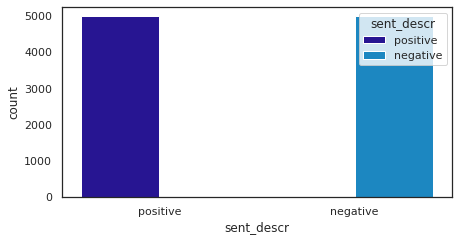

In [21]:
# Let's visualize and verify that our data is consistent.

plt.figure(figsize=(7, 3.5))
sns.set_theme(style="white", palette="nipy_spectral")
sns.countplot(data=tweets_df, x="sent_descr", hue="sent_descr")

In [22]:
tweets_df = tweets_df.drop(["sent_descr"], axis=1)

## <font color='green'>Preprocessing</font>

Text processing is an essential part of performing data analytics or modeling on string data. Unlike numerical and even categorical variables, text data can't be easily structured in a table format and has its own very unique and rather complex set of rules that it follows. Engaging in text processing allows us to move onto more difficult tasks which are unique to dealing with text

#### What is text processing?

**Text processing** is the practice of manipulating text data in order to make it more amenable to analysis and modeling. There are a whole host of powerful libraries dedicated to this, including:

- `string` and `str.methods`
- Regular expressions
- Natural language processing libraries such as `nltk`. `gensim`, and `spaCy`


### Preprocessing Tasks

We have several preprocessing tasks when analyzing text:

- Tokenize
- Remove Stop Words
- Clean special characters in text
- Stemming/Lemmatization

## <font color='green'>Cleaning text </font>

* A good practice is to standardize the text. 
* For an easier text manipulation we will convert any string to lowercase. 
* We will remove special characters and any strings that are not going to be needed for further analysis.

**String module**

Cleaning the tweets before going though any other text manipulation is helpful. For these first steps we will use some of the methods that the module String has. __[To learn more about the String methods click here.](https://docs.python.org/3/library/stdtypes.html#string-methods)__ 

Some of the String Methods:

- capitalize():	Converts the first character to upper case
- casefold():	Converts string into lower case
- center():	Returns a centered string
- count():	Returns the number of times a specified value occurs in a string
- endswith():	Returns true if the string ends with the specified value
- find():	Searches the string for a specified value and returns the position of where it was found
- isalnum()	Returns True if all characters in the string are alphanumeric
- isalpha()	Returns True if all characters in the string are in the alphabet
- isascii()	Returns True if all characters in the string are ascii characters
- isdecimal()	Returns True if all characters in the string are decimals
- isdigit()	Returns True if all characters in the string are digits
- isidentifier()	Returns True if the string is an identifier
- islower()	Returns True if all characters in the string are lower case
- isnumeric()	Returns True if all characters in the string are numeric
- isprintable()	Returns True if all characters in the string are printable
- isspace()	Returns True if all characters in the string are whitespaces
- istitle()	Returns True if the string follows the rules of a title
- isupper()	Returns True if all characters in the string are upper case
- lower()	Converts a string into lower case
- lstrip()	Returns a left trim version of the string
- replace()	Returns a string where a specified value is replaced with a specified value
- rsplit()	Splits the string at the specified separator, and returns a list
- rstrip()	Returns a right trim version of the string
- split()	Splits the string at the specified separator, and returns a list
- splitlines()	Splits the string at line breaks and returns a list
- startswith()	Returns true if the string starts with the specified value
- strip()	Returns a trimmed version of the string
- swapcase()	Swaps cases, lower case becomes upper case and vice versa
- title()	Converts the first character of each word to upper case
- translate()	Returns a translated string
- upper()	Converts a string into upper case
- zfill()	Fills the string with a specified number of 0 values at the beginning

In [23]:
# Before we start, let's create a copy of our data so we can compare all the changes later.
initial_df = tweets_df.copy()

#### Converting any uppercase string to lowercase.

In [24]:
def lowercase_func(tweets):
    return tweets.lower()


tweets_df["tweets"] = tweets_df["tweets"].apply(lambda x: lowercase_func(x))
tweets_df

,tweets,sentiment
0,#followfriday @france_inte @pkuchly57 @milipol...,1
1,@lamb2ja hey james! how odd :/ please call our...,1
2,@despiteofficial we had a listen last night :)...,1
3,@97sides congrats :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
9995,i wanna change my avi but usanele :(,0
9996,my puppy broke her foot :(,0
9997,where's all the jaebum baby pictures :((,0
9998,but but mr ahmad maslan cooks too :( https://t...,0


#### Removing URL's using the `find()` method from the String : 

Python string method find() determines if string str occurs in string, or in a substring of string if starting index beg and ending index end are given.

We will search for all the tweets that contain "http". Once we've identified them, we will remove the URL's

In [25]:
def find_url_in_tweets(tweets):
    return tweets.find("http")


tweets_df["find_url"] = tweets_df["tweets"].apply(lambda m: find_url_in_tweets(m))
tweets_df

,tweets,sentiment,find_url
0,#followfriday @france_inte @pkuchly57 @milipol...,1,-1
1,@lamb2ja hey james! how odd :/ please call our...,1,-1
2,@despiteofficial we had a listen last night :)...,1,-1
3,@97sides congrats :),1,-1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,-1
...,...,...,...
9995,i wanna change my avi but usanele :(,0,-1
9996,my puppy broke her foot :(,0,-1
9997,where's all the jaebum baby pictures :((,0,-1
9998,but but mr ahmad maslan cooks too :( https://t...,0,37


In [26]:
with_url = range(140)


match_url = tweets_df[tweets_df["find_url"].isin(with_url)]
match_url.head(10)

,tweets,sentiment,find_url
5,@bhaktisbanter @pallaviruhail this one is irre...,1,81
6,we don't like to keep our lovely customers wai...,1,104
11,who wouldn't love these big....juicy....selfie...,1,53
12,@mish23615351 follow @jnlazts &amp; http://t....,1,37
14,great new opportunity for junior triathletes a...,1,107
19,hello i need to know something can u fm me on ...,1,80
27,spiritual ritual festival (népal)\nbeginning o...,1,105
30,my kik - hatessuce32429 #kik #kikme #lgbt #tin...,1,74
35,@jamiefigsxx follow @jnlazts &amp; http://t.c...,1,36
43,i added a video to a @youtube playlist http://...,1,39


- Reviewing the tweets that include URL's

In [27]:
# Looking at the datapoint with index 0 to confirm that it has an URL.
match_url["tweets"].iloc[0]

'@bhaktisbanter @pallaviruhail this one is irresistible :)\n#flipkartfashionfriday http://t.co/ebz0l2venm'

- Removing URL's from tweets.

In [28]:
def remove_urls(tweets):
    url_pattern = re.compile(r"http[s]?://\S+|www\.\S+")
    return url_pattern.sub(r"", tweets)


tweets_df["tweets"] = tweets_df["tweets"].apply(remove_urls)
tweets_df.head(10)

,tweets,sentiment,find_url
0,#followfriday @france_inte @pkuchly57 @milipol...,1,-1
1,@lamb2ja hey james! how odd :/ please call our...,1,-1
2,@despiteofficial we had a listen last night :)...,1,-1
3,@97sides congrats :),1,-1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,-1
5,@bhaktisbanter @pallaviruhail this one is irre...,1,81
6,we don't like to keep our lovely customers wai...,1,104
7,"@impatientraider on second thought, there’s ju...",1,-1
8,"jgh , but we have to go to bayan :d bye",1,-1
9,"as an act of mischievousness, am calling the e...",1,-1


In [29]:
tweets_df["tweets"].iloc[5]

'@bhaktisbanter @pallaviruhail this one is irresistible :)\n#flipkartfashionfriday '

In [30]:
# Since we won't need anymore the column find_url, we will drop it.
tweets_df = tweets_df.drop(["find_url"], axis=1)

### Replacing emojis and emoticons with words

In [32]:
# We will use the library emot, which is open source.
# we'll need version 2.1 specifically
!pip install emot==2.1

In [33]:
from emot.emo_unicode import UNICODE_EMO,EMOTICONS

In [34]:
UNICODE_EMO['😂'].replace(",", " ").replace(":", " ").split()
#UNICODE_EMO['😂']

['face_with_tears_of_joy']

In [35]:
EMOTICONS

{':‑\\)': 'Happy face or smiley',
 ':\\)': 'Happy face or smiley',
 ':-\\]': 'Happy face or smiley',
 ':\\]': 'Happy face or smiley',
 ':-3': 'Happy face smiley',
 ':3': 'Happy face smiley',
 ':->': 'Happy face smiley',
 ':>': 'Happy face smiley',
 '8-\\)': 'Happy face smiley',
 ':o\\)': 'Happy face smiley',
 ':-\\}': 'Happy face smiley',
 ':\\}': 'Happy face smiley',
 ':-\\)': 'Happy face smiley',
 ':c\\)': 'Happy face smiley',
 ':\\^\\)': 'Happy face smiley',
 '=\\]': 'Happy face smiley',
 '=\\)': 'Happy face smiley',
 ':‑D': 'Laughing, big grin or laugh with glasses',
 ':D': 'Laughing, big grin or laugh with glasses',
 '8‑D': 'Laughing, big grin or laugh with glasses',
 '8D': 'Laughing, big grin or laugh with glasses',
 'X‑D': 'Laughing, big grin or laugh with glasses',
 'XD': 'Laughing, big grin or laugh with glasses',
 '=D': 'Laughing, big grin or laugh with glasses',
 '=3': 'Laughing, big grin or laugh with glasses',
 'B\\^D': 'Laughing, big grin or laugh with glasses',
 ':-\\)\\

- Converting emojis into words.

In [36]:
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(
            emot,
            "  ".join(UNICODE_EMO[emot].replace(",", " ").replace(":", " ").split()),
        )
    return text


# Example:
emotions = "✨🎉😍👌 🤩 😂😎"
convert_emojis(emotions)

'sparklesparty_poppersmiling_face_with_heart-eyesOK_hand 🤩 face_with_tears_of_joysmiling_face_with_sunglasses'

- Convert emoticons into words.

In [37]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(
            u"(" + emot + ")", " ".join(EMOTICONS[emot].replace(",", "").split()), text
        )
    return text

In [38]:
# Example:
faces = ":) =) XD :D :( :D :3 ^_^"
convert_emoticons(faces)

'Happy face or smiley Happy face smiley Laughing big grin or laugh with glasses Laughing big grin or laugh with glasses Frown sad andry or pouting Laughing big grin or laugh with glasses Happy face smiley Joyful'

- Replacing emojis and emoticons from the tweets.

In [39]:
tweets_df["clean_tweets"] = tweets_df["tweets"].apply(convert_emoticons)
tweets_df["clean_tweets"] = tweets_df["clean_tweets"].apply(convert_emojis)
tweets_df.head(10)

,tweets,sentiment,clean_tweets
0,#followfriday @france_inte @pkuchly57 @milipol...,1,#followfriday @france_inte @pkuchly57 @milipol...
1,@lamb2ja hey james! how odd :/ please call our...,1,@lamb2ja hey james! how odd Skeptical annoyed ...
2,@despiteofficial we had a listen last night :)...,1,@despiteofficial we had a listen last night Ha...
3,@97sides congrats :),1,@97sides congrats Happy face or smiley
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,yeaaaah yippppy!!! my accnt verified rqst has...
5,@bhaktisbanter @pallaviruhail this one is irre...,1,@bhaktisbanter @pallaviruhail this one is irre...
6,we don't like to keep our lovely customers wai...,1,we don't like to keep our lovely customers wai...
7,"@impatientraider on second thought, there’s ju...",1,"@impatientraider on second thought, there’s ju..."
8,"jgh , but we have to go to bayan :d bye",1,"jgh , but we have to go to bayan :d bye"
9,"as an act of mischievousness, am calling the e...",1,"as an act of mischievousness, am calling the e..."


Removing mentions(@). For example @mariacamila2000000  

In [40]:
def remove_mentions(tweets):
    mention_pattern = re.compile(r"(@[A-Za-z0-9]+)|[_]|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
    return mention_pattern.sub(r"", tweets)


tweets_df["clean_tweets"] = tweets_df["clean_tweets"].apply(remove_mentions)
tweets_df.head(5)

,tweets,sentiment,clean_tweets
0,#followfriday @france_inte @pkuchly57 @milipol...,1,followfriday inte paris for being top engaged...
1,@lamb2ja hey james! how odd :/ please call our...,1,hey james how odd Skeptical annoyed undecided...
2,@despiteofficial we had a listen last night :)...,1,we had a listen last night Happy face or smil...
3,@97sides congrats :),1,congrats Happy face or smiley
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,yeaaaah yippppy my accnt verified rqst has su...


Removing any noise that might be left: Special characters

In [41]:
def remove_noise(tweet):
    tweet = re.sub("(@[A-Za-z0–9_]+)", "", tweet)
    tweet = "".join([char if char not in string.punctuation else " " for char in tweet])
    tweet = re.sub(" +", " ", tweet)
    tweet = re.sub("[0–9]+", "", tweet)
    tweet = re.sub("[^A-Za-z0–9_. ]+", "", tweet)

    return tweet


tweets_df["clean_tweets"] = tweets_df["clean_tweets"].apply(lambda x: remove_noise(x))

# Applying the lowercase method again given that emojis and emoticons were converted, and the dictionary that includes all
# of these emojis and emoticons have the definitions with the first letter in uppercase.

tweets_df["clean_tweets"] = tweets_df["clean_tweets"].apply(lambda x: lowercase_func(x))
tweets_df

,tweets,sentiment,clean_tweets
0,#followfriday @france_inte @pkuchly57 @milipol...,1,followfriday inte paris for being top engaged ...
1,@lamb2ja hey james! how odd :/ please call our...,1,hey james how odd skeptical annoyed undecided...
2,@despiteofficial we had a listen last night :)...,1,we had a listen last night happy face or smil...
3,@97sides congrats :),1,congrats happy face or smiley
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,yeaaaah yippppy my accnt verified rqst has suc...
...,...,...,...
9995,i wanna change my avi but usanele :(,0,i wanna change my avi but usanele frown sad an...
9996,my puppy broke her foot :(,0,my puppy broke her foot frown sad andry or pou...
9997,where's all the jaebum baby pictures :((,0,wheres all the jaebum baby pictures frown sad ...
9998,but but mr ahmad maslan cooks too :(,0,but but mr ahmad maslan cooks too frown sad an...


## <font color='green'>Stopwords</font>




In [42]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**What are stopwords?**


**What are the languages available?**

In [43]:
print("English:\n", stopwords.words("english"))
print("\nSpanish:\n", stopwords.words("spanish"))
print("\nRussian:\n", stopwords.words("russian"))

English:
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',

### Selecting stop words

Given that we are aiming to perform a Sentiment Analysis, we don't want to remove the negative stopwords because it could impact our detection of any negative sentiment.

In [44]:
# We use NLTK - Loading stop words and removing negative stop words from the list

stop_words = stopwords.words("english")
keep_these_words = [
    "don",
    "don't",
    "ain",
    "aren",
    "aren't",
    "couldn",
    "couldn't",
    "didn",
    "didn't",
    "doesn",
    "doesn't",
    "hadn",
    "hadn't",
    "hasn",
    "hasn't",
    "haven",
    "haven't",
    "isn",
    "isn't",
    "ma",
    "mightn",
    "mightn't",
    "mustn",
    "mustn't",
    "needn",
    "needn't",
    "shan",
    "shan't",
    "no",
    "nor",
    "not",
    "shouldn",
    "shouldn't",
    "wasn",
    "wasn't",
    "weren",
    "weren't",
    "won",
    "won't",
    "wouldn",
    "wouldn't",
]

our_stop_words = stop_words
for word in keep_these_words:
    our_stop_words.remove(word)

print(our_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

***Before removing the stop words from our tweets, let's review what is Tokenization.***

## <font color='green'>Tokenization</font>

* Tokenizers divide strings into lists of substrings. 
* Tokenization consists of dividing a piece of text into smaller pieces. 
* We can divide paragraph into sentences, sentence into words or word into characters.

How do we understand the meaning of a sentence?

We read each word, interpret its meaning, and read the next word until we find an end point. This is the reason why tokenization exists. If we want to create a model, the model might need all the words that make up the sentence separately. If instead on a sentence we have a paragraph, then we need to get all the sentences and out of all these sentences, we need to get the words. At that point we can move forward to perform any kind of prediction.

**What is Tokenization?**
String tokenization is a process where a string is broken into several parts or tokens.

**Why is important?**
- It is important because before doing a text analysis we to identify the words that constitute a string of characters. 
- It's also important because we can identify the different type of words after obtaining the tokens.

NLTK has different tokenize methods that can be applied to strings according to the desire output. sentences, words, characters. 

1. sent_tokenize(): Splits strings into sentences according to punctuation rules that have been already pre trained. 
2. regexp_tokenize(): Splits strings into substrings using regular expressions. 
3. word_tokenize(): Find words and punctuation in a string

**1. Splitting a string into sentences using `sent_tokenize()`**

In [45]:
# Let's review an example before applying it to our DataFrames.

first_paragraph = """1. The Imitation Game\nI propose to consider the question, ""Can machines think?"" This should begin 
with definitions of the meaning of the terms ""machine"" and ""think."" The definitions might be framed so as to reflect so 
far as possible the normal use of the words, but this attitude is dangerous, If the meaning of the words ""machine"" and 
""think"" are to be found by examining how they are commonly used it is difficult to escape the conclusion that the meaning 
and the answer to the question, ""Can machines think?"" is to be sought in a statistical survey such as a Gallup poll. But 
this is absurd. Instead of attempting such a definition I shall replace the question by another, which is closely related 
to it and is expressed in relatively unambiguous words." """

first_paragraph

'1. The Imitation Game\nI propose to consider the question, ""Can machines think?"" This should begin \nwith definitions of the meaning of the terms ""machine"" and ""think."" The definitions might be framed so as to reflect so \nfar as possible the normal use of the words, but this attitude is dangerous, If the meaning of the words ""machine"" and \n""think"" are to be found by examining how they are commonly used it is difficult to escape the conclusion that the meaning \nand the answer to the question, ""Can machines think?"" is to be sought in a statistical survey such as a Gallup poll. But \nthis is absurd. Instead of attempting such a definition I shall replace the question by another, which is closely related \nto it and is expressed in relatively unambiguous words." '

In [46]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(first_paragraph)
sentences

[nltk_data] Downloading package punkt to /home/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['1.',
 'The Imitation Game\nI propose to consider the question, ""Can machines think?""',
 'This should begin \nwith definitions of the meaning of the terms ""machine"" and ""think.""',
 'The definitions might be framed so as to reflect so \nfar as possible the normal use of the words, but this attitude is dangerous, If the meaning of the words ""machine"" and \n""think"" are to be found by examining how they are commonly used it is difficult to escape the conclusion that the meaning \nand the answer to the question, ""Can machines think?""',
 'is to be sought in a statistical survey such as a Gallup poll.',
 'But \nthis is absurd.',
 'Instead of attempting such a definition I shall replace the question by another, which is closely related \nto it and is expressed in relatively unambiguous words."']

In [47]:
# We can check how many sentences we got from the first text we have used for this example:
print("The number of sentences is", len(sentences))

The number of sentences is 7


**2. Splitting strings to substrings using `regexp_tokenize()`**
- We'll use ``regexp_tokenize()`` to get substrings and words using a pattern

- Using a pattern to tokenize on whitespaces. 
  
    - The pattern we are adding in the next cell code ``pattern='\s+'`` means: 
        * `\s` white space character
        * `+` one or more 

    - That means that the patter `pattern='\s+'` is splitting each string into tokens using one specific pattern: One or more white spaces.
- The patterns can be chosen from the regular expressions. __[Click here to learn more.](https://en.wikipedia.org/wiki/Regular_expression)__ 
- We select ``gaps=True``:
    - True if this tokenizer’s pattern should be used to find separators between tokens;
    - False if this tokenizer’s pattern should be used to find the tokens themselves.

In [48]:
from nltk.tokenize import regexp_tokenize

words_regex = regexp_tokenize(first_paragraph, pattern="\s+", gaps=True)
print(words_regex)

['1.', 'The', 'Imitation', 'Game', 'I', 'propose', 'to', 'consider', 'the', 'question,', '""Can', 'machines', 'think?""', 'This', 'should', 'begin', 'with', 'definitions', 'of', 'the', 'meaning', 'of', 'the', 'terms', '""machine""', 'and', '""think.""', 'The', 'definitions', 'might', 'be', 'framed', 'so', 'as', 'to', 'reflect', 'so', 'far', 'as', 'possible', 'the', 'normal', 'use', 'of', 'the', 'words,', 'but', 'this', 'attitude', 'is', 'dangerous,', 'If', 'the', 'meaning', 'of', 'the', 'words', '""machine""', 'and', '""think""', 'are', 'to', 'be', 'found', 'by', 'examining', 'how', 'they', 'are', 'commonly', 'used', 'it', 'is', 'difficult', 'to', 'escape', 'the', 'conclusion', 'that', 'the', 'meaning', 'and', 'the', 'answer', 'to', 'the', 'question,', '""Can', 'machines', 'think?""', 'is', 'to', 'be', 'sought', 'in', 'a', 'statistical', 'survey', 'such', 'as', 'a', 'Gallup', 'poll.', 'But', 'this', 'is', 'absurd.', 'Instead', 'of', 'attempting', 'such', 'a', 'definition', 'I', 'shall'

In [49]:
# How many substrings did we get?
print("The number of substrings is", len(words_regex))

The number of substrings is 133


**3. Splitting a string into words and punctuation using `word_tokenize()`**

In [50]:
from nltk.tokenize import word_tokenize

words_tokens = word_tokenize(first_paragraph)
print(words_tokens)

['1', '.', 'The', 'Imitation', 'Game', 'I', 'propose', 'to', 'consider', 'the', 'question', ',', '``', "''", 'Can', 'machines', 'think', '?', "''", "''", 'This', 'should', 'begin', 'with', 'definitions', 'of', 'the', 'meaning', 'of', 'the', 'terms', '``', "''", 'machine', "''", "''", 'and', '``', "''", 'think', '.', "''", "''", 'The', 'definitions', 'might', 'be', 'framed', 'so', 'as', 'to', 'reflect', 'so', 'far', 'as', 'possible', 'the', 'normal', 'use', 'of', 'the', 'words', ',', 'but', 'this', 'attitude', 'is', 'dangerous', ',', 'If', 'the', 'meaning', 'of', 'the', 'words', '``', "''", 'machine', "''", "''", 'and', "''", "''", 'think', "''", "''", 'are', 'to', 'be', 'found', 'by', 'examining', 'how', 'they', 'are', 'commonly', 'used', 'it', 'is', 'difficult', 'to', 'escape', 'the', 'conclusion', 'that', 'the', 'meaning', 'and', 'the', 'answer', 'to', 'the', 'question', ',', '``', "''", 'Can', 'machines', 'think', '?', "''", "''", 'is', 'to', 'be', 'sought', 'in', 'a', 'statistical'

In [51]:
print("The number of substrings is", len(words_tokens))

The number of substrings is 170


In [52]:
from nltk.tokenize import TweetTokenizer

twk = TweetTokenizer()
tweet_tokens = twk.tokenize(first_paragraph)
print(tweet_tokens)

['1', '.', 'The', 'Imitation', 'Game', 'I', 'propose', 'to', 'consider', 'the', 'question', ',', '"', '"', 'Can', 'machines', 'think', '?', '"', '"', 'This', 'should', 'begin', 'with', 'definitions', 'of', 'the', 'meaning', 'of', 'the', 'terms', '"', '"', 'machine', '"', '"', 'and', '"', '"', 'think', '.', '"', '"', 'The', 'definitions', 'might', 'be', 'framed', 'so', 'as', 'to', 'reflect', 'so', 'far', 'as', 'possible', 'the', 'normal', 'use', 'of', 'the', 'words', ',', 'but', 'this', 'attitude', 'is', 'dangerous', ',', 'If', 'the', 'meaning', 'of', 'the', 'words', '"', '"', 'machine', '"', '"', 'and', '"', '"', 'think', '"', '"', 'are', 'to', 'be', 'found', 'by', 'examining', 'how', 'they', 'are', 'commonly', 'used', 'it', 'is', 'difficult', 'to', 'escape', 'the', 'conclusion', 'that', 'the', 'meaning', 'and', 'the', 'answer', 'to', 'the', 'question', ',', '"', '"', 'Can', 'machines', 'think', '?', '"', '"', 'is', 'to', 'be', 'sought', 'in', 'a', 'statistical', 'survey', 'such', 'as'

In [53]:
print("The number of substrings is", len(tweet_tokens))

The number of substrings is 170


**Let's try the tokenizers for our tweets.** 
- Which one would be better for the following text processing steps?
- Is the combination of some characters useful for analyzing tweets? 

In [54]:
tweets_df["tweets"].apply(lambda x: sent_tokenize(x))

0       [#followfriday @france_inte @pkuchly57 @milipo...
1       [@lamb2ja hey james!, how odd :/ please call o...
2       [@despiteofficial we had a listen last night :...
3                                  [@97sides congrats :)]
4       [yeaaaah yippppy!!!, my accnt verified rqst ha...
                              ...                        
9995               [i wanna change my avi but usanele :(]
9996                         [my puppy broke her foot :(]
9997           [where's all the jaebum baby pictures :((]
9998               [but but mr ahmad maslan cooks too :(]
9999    [@eawoman as a hull supporter i am expecting a...
Name: tweets, Length: 10000, dtype: object

In [55]:
tweets_df["tweets"].apply(lambda x: regexp_tokenize(x, pattern="\s+", gaps=True))

0       [#followfriday, @france_inte, @pkuchly57, @mil...
1       [@lamb2ja, hey, james!, how, odd, :/, please, ...
2       [@despiteofficial, we, had, a, listen, last, n...
3                                [@97sides, congrats, :)]
4       [yeaaaah, yippppy!!!, my, accnt, verified, rqs...
                              ...                        
9995        [i, wanna, change, my, avi, but, usanele, :(]
9996                    [my, puppy, broke, her, foot, :(]
9997     [where's, all, the, jaebum, baby, pictures, :((]
9998        [but, but, mr, ahmad, maslan, cooks, too, :(]
9999    [@eawoman, as, a, hull, supporter, i, am, expe...
Name: tweets, Length: 10000, dtype: object

In [56]:
tweets_df["tweets"].apply(lambda x: word_tokenize(x))

0       [#, followfriday, @, france_inte, @, pkuchly57...
1       [@, lamb2ja, hey, james, !, how, odd, :, /, pl...
2       [@, despiteofficial, we, had, a, listen, last,...
3                            [@, 97sides, congrats, :, )]
4       [yeaaaah, yippppy, !, !, !, my, accnt, verifie...
                              ...                        
9995    [i, wan, na, change, my, avi, but, usanele, :, (]
9996                  [my, puppy, broke, her, foot, :, (]
9997    [where, 's, all, the, jaebum, baby, pictures, ...
9998      [but, but, mr, ahmad, maslan, cooks, too, :, (]
9999    [@, eawoman, as, a, hull, supporter, i, am, ex...
Name: tweets, Length: 10000, dtype: object

* Before getting the tokens from our tweets, we will proceed to **remove the stop words**.

In [57]:
from nltk.tokenize import word_tokenize


def remove_stop_words(tweet):
    tokens = word_tokenize(tweet)
    tweet_with_no_stop_words = [
        token for token in tokens if not token in our_stop_words
    ]
    reformed_tweet = " ".join(tweet_with_no_stop_words)

    return reformed_tweet


tweets_df["clean_tweets"] = tweets_df["clean_tweets"].apply(
    lambda x: remove_stop_words(x)
)

# Saving clean tweets
tweets_df["tweets"] = tweets_df["clean_tweets"]
tweets_df = tweets_df.drop(["clean_tweets"], axis=1)
tweets_df

,tweets,sentiment
0,followfriday inte paris top engaged members co...,1
1,hey james odd skeptical annoyed undecided unea...,1
2,listen last night happy face smiley bleed amaz...,1
3,congrats happy face smiley,1
4,yeaaaah yippppy accnt verified rqst succeed go...,1
...,...,...
9995,wan na change avi usanele frown sad andry pouting,0
9996,puppy broke foot frown sad andry pouting,0
9997,wheres jaebum baby pictures frown sad andry po...,0
9998,mr ahmad maslan cooks frown sad andry pouting,0


To serve our purpose, we would like to keep some combination of characters as they can reference emojis and therefore, they can reference emotions. This is why instead of using `word_tokenize()` we will use `regexp_tokenize()`. 

Let's create an additional column in our DataFrame *tweets_df* to track the different process we are going to perform.

In [58]:
tweets_df["tweets_token"] = tweets_df["tweets"].apply(
    lambda x: regexp_tokenize(x, pattern="\s+", gaps=True)
)
tweets_df

,tweets,sentiment,tweets_token
0,followfriday inte paris top engaged members co...,1,"[followfriday, inte, paris, top, engaged, memb..."
1,hey james odd skeptical annoyed undecided unea...,1,"[hey, james, odd, skeptical, annoyed, undecide..."
2,listen last night happy face smiley bleed amaz...,1,"[listen, last, night, happy, face, smiley, ble..."
3,congrats happy face smiley,1,"[congrats, happy, face, smiley]"
4,yeaaaah yippppy accnt verified rqst succeed go...,1,"[yeaaaah, yippppy, accnt, verified, rqst, succ..."
...,...,...,...
9995,wan na change avi usanele frown sad andry pouting,0,"[wan, na, change, avi, usanele, frown, sad, an..."
9996,puppy broke foot frown sad andry pouting,0,"[puppy, broke, foot, frown, sad, andry, pouting]"
9997,wheres jaebum baby pictures frown sad andry po...,0,"[wheres, jaebum, baby, pictures, frown, sad, a..."
9998,mr ahmad maslan cooks frown sad andry pouting,0,"[mr, ahmad, maslan, cooks, frown, sad, andry, ..."


* Let's check how many tokens do we get from each tweet after the tokenization. 

In [59]:
tweets_df["tweets_length"] = tweets_df["tweets_token"].apply(lambda x: len(x))
tweets_df

,tweets,sentiment,tweets_token,tweets_length
0,followfriday inte paris top engaged members co...,1,"[followfriday, inte, paris, top, engaged, memb...",11
1,hey james odd skeptical annoyed undecided unea...,1,"[hey, james, odd, skeptical, annoyed, undecide...",19
2,listen last night happy face smiley bleed amaz...,1,"[listen, last, night, happy, face, smiley, ble...",10
3,congrats happy face smiley,1,"[congrats, happy, face, smiley]",4
4,yeaaaah yippppy accnt verified rqst succeed go...,1,"[yeaaaah, yippppy, accnt, verified, rqst, succ...",16
...,...,...,...,...
9995,wan na change avi usanele frown sad andry pouting,0,"[wan, na, change, avi, usanele, frown, sad, an...",9
9996,puppy broke foot frown sad andry pouting,0,"[puppy, broke, foot, frown, sad, andry, pouting]",7
9997,wheres jaebum baby pictures frown sad andry po...,0,"[wheres, jaebum, baby, pictures, frown, sad, a...",8
9998,mr ahmad maslan cooks frown sad andry pouting,0,"[mr, ahmad, maslan, cooks, frown, sad, andry, ...",8


* After getting the length for each tweet, we can check the distribution for the tweet's length. 

<AxesSubplot:xlabel='tweets_length'>

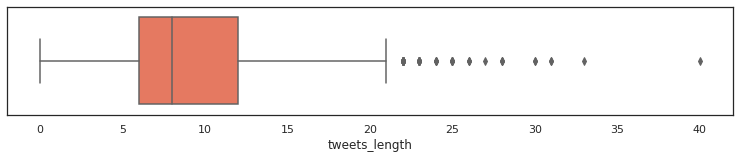

In [60]:
plt.figure(figsize=(13, 2))
sns.boxplot(data=tweets_df, x="tweets_length", palette="Reds_r")

<AxesSubplot:xlabel='tweets_length', ylabel='Count'>

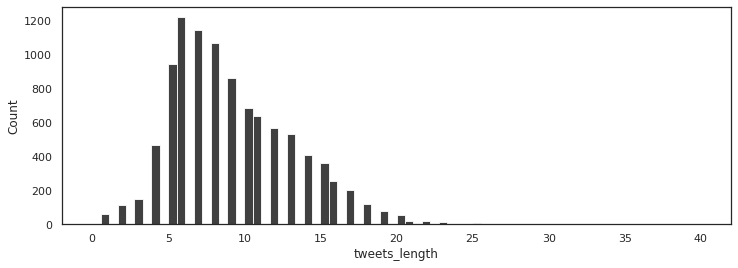

In [61]:
plt.figure(figsize=(12, 4))
sns.set_theme(style="white")

sns.histplot(tweets_df, x="tweets_length", color="black")

In [62]:
print("Q25=", tweets_df["tweets_length"].quantile(q=0.25))
print("Q50=", tweets_df["tweets_length"].quantile(q=0.5))
print("Q75=", tweets_df["tweets_length"].quantile(q=0.75))

Q25= 6.0
Q50= 8.0
Q75= 12.0


In [63]:
tweets_df.tweets_length.describe()

count    10000.00000
mean         9.15850
std          4.05199
min          0.00000
25%          6.00000
50%          8.00000
75%         12.00000
max         40.00000
Name: tweets_length, dtype: float64

In [64]:
# Dropping the column tweets_length given that we will not need it for the next steps of our analysis
tweets_df = tweets_df.drop(["tweets_length"], axis=1)

### Using Collections library

The Collections module implements high-performance container datatypes (beyond the built-in types list, dict and tuple) and contains many useful data structures that you can use to store information in memory.

**Counter()**
* A Counter is a container that tracks how many times equivalent values are added.
* It can be used to implement the same algorithms for which other languages commonly use bag or multi-set data structures

In [65]:
from collections import Counter

tokens = Counter()
tweets_df["tweets_token"].apply(tokens.update)

# Printing the count of the tokens
tokens_df = (
    pd.DataFrame.from_dict(tokens, orient="index")
    .reset_index()
    .rename(columns={"index": "token", 0: "count"})
)

tokens_df.sort_values(by="count", ascending=False)

,token,count
1520,sad,5272
3880,andry,5147
3881,pouting,5037
3879,frown,4981
8,happy,4498
...,...,...
2324,accumulated,1
7212,smileyplz,1
7211,tweeeps,1
7210,afterznoon,1


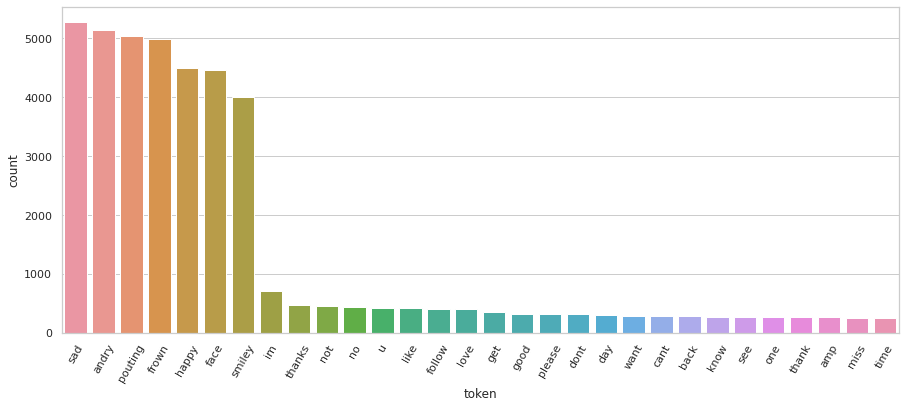

In [66]:
plot_tokens_top_30 = tokens_df.sort_values(by="count", ascending=False).head(30)

plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="token", y="count", data=plot_tokens_top_30)
_ = plt.xticks(rotation=60)

## <font color='green'>Stemming/Lemmatization</font>

## <font color='green'>- Stemming</font>


Stemming is the process of removing prefixes and suffixes from words so that they are reduced to simpler forms which are called stems.

In [67]:
from nltk import PorterStemmer

sentence = [
    "I",
    "was",
    "thinking",
    "about",
    "geometry",
    "while",
    "I",
    "was",
    "enjoying",
    "the",
    "best",
    "month",
    "of",
    "winter",
]
porterStemmer = PorterStemmer()

print(
    " Sentence:\n",
    sentence,
    "\n\n",
    "Sentence with stemming:\n",
    " ".join([porterStemmer.stem(word) for word in sentence]),
    "\n",
)

 Sentence:
 ['I', 'was', 'thinking', 'about', 'geometry', 'while', 'I', 'was', 'enjoying', 'the', 'best', 'month', 'of', 'winter'] 

 Sentence with stemming:
 i wa think about geometri while i wa enjoy the best month of winter 



In [68]:
porterStemmer = PorterStemmer()
tweets_df["t_stem"] = tweets_df["tweets_token"].apply(
    lambda lst: [porterStemmer.stem(word) for word in lst]
)
tweets_df

,tweets,sentiment,tweets_token,t_stem
0,followfriday inte paris top engaged members co...,1,"[followfriday, inte, paris, top, engaged, memb...","[followfriday, int, pari, top, engag, member, ..."
1,hey james odd skeptical annoyed undecided unea...,1,"[hey, james, odd, skeptical, annoyed, undecide...","[hey, jame, odd, skeptic, annoy, undecid, unea..."
2,listen last night happy face smiley bleed amaz...,1,"[listen, last, night, happy, face, smiley, ble...","[listen, last, night, happi, face, smiley, ble..."
3,congrats happy face smiley,1,"[congrats, happy, face, smiley]","[congrat, happi, face, smiley]"
4,yeaaaah yippppy accnt verified rqst succeed go...,1,"[yeaaaah, yippppy, accnt, verified, rqst, succ...","[yeaaaah, yippppi, accnt, verifi, rqst, succee..."
...,...,...,...,...
9995,wan na change avi usanele frown sad andry pouting,0,"[wan, na, change, avi, usanele, frown, sad, an...","[wan, na, chang, avi, usanel, frown, sad, andr..."
9996,puppy broke foot frown sad andry pouting,0,"[puppy, broke, foot, frown, sad, andry, pouting]","[puppi, broke, foot, frown, sad, andri, pout]"
9997,wheres jaebum baby pictures frown sad andry po...,0,"[wheres, jaebum, baby, pictures, frown, sad, a...","[where, jaebum, babi, pictur, frown, sad, andr..."
9998,mr ahmad maslan cooks frown sad andry pouting,0,"[mr, ahmad, maslan, cooks, frown, sad, andry, ...","[mr, ahmad, maslan, cook, frown, sad, andri, p..."


## <font color='green'>- Lemmatization</font>

***Lemmatization reduce words to their root form.***

In lemmatization, the speech part of a word must be determined first and the normalization rules will be different for different parts of the speech, whereas, the stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words that have different meanings depending on part of the speech.

### Generating tags for each token in the text to Normalize sentences and to lemmatize each word using the tag

- The function lemmatize_sentence gets the position tag of each token of a tweet.
- For example, if the tag starts with NN, the token is assigned as a noun. 

In [69]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

sentence = [
    "I",
    "was",
    "thinking",
    "about",
    "geometry",
    "while",
    "I",
    "was",
    "enjoying",
    "the",
    "best",
    "month",
    "of",
    "winter",
]
lemmatizer = WordNetLemmatizer()

print(
    " Sentence:\n",
    sentence,
    "\n\n",
    "Sentence with lemmatizing:\n",
    " ".join([lemmatizer.lemmatize(word) for word in sentence]),
    "\n",
)

[nltk_data] Downloading package wordnet to /home/chris/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 Sentence:
 ['I', 'was', 'thinking', 'about', 'geometry', 'while', 'I', 'was', 'enjoying', 'the', 'best', 'month', 'of', 'winter'] 

 Sentence with lemmatizing:
 I wa thinking about geometry while I wa enjoying the best month of winter 



##  Tagging using `pos_tag`

A "tag" is a case-sensitive string that specifies some property of a token, such as its part of speech. Tagged tokens are encoded as tuples (tag, token). https://www.nltk.org/api/nltk.tag.html

Common tags:
- **CC:** conjunction, coordinating
- **IN:** preposition or conjunction, subordinating
- **JJ:** adjective or numeral, ordinal
- **NN:** noun, common, singular or mass
- **PRP:** pronoun, personal
- **SYM:** symbol
- **VB:** verb, base form

In [70]:
# Run this cell to learn more about the tags
# nltk.help.upenn_tagset()

In [71]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

sentence = [
    "I",
    "was",
    "thinking",
    "about",
    "geometry",
    "while",
    "I",
    "was",
    "enjoying",
    "the",
    "best",
    "month",
    "of",
    "winter",
]

nltk.pos_tag(sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/chris/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('was', 'VBD'),
 ('thinking', 'VBG'),
 ('about', 'IN'),
 ('geometry', 'NN'),
 ('while', 'IN'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('enjoying', 'VBG'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('month', 'NN'),
 ('of', 'IN'),
 ('winter', 'NN')]

**Getting the lemmas using `tweets_tokens.`**

In [72]:
lmtzr = WordNetLemmatizer()
tweets_df["t_lemma"] = tweets_df["tweets_token"].apply(
    lambda lst: [lmtzr.lemmatize(word) for word in lst]
)
tweets_df.tail()

,tweets,sentiment,tweets_token,t_stem,t_lemma
9995,wan na change avi usanele frown sad andry pouting,0,"[wan, na, change, avi, usanele, frown, sad, an...","[wan, na, chang, avi, usanel, frown, sad, andr...","[wan, na, change, avi, usanele, frown, sad, an..."
9996,puppy broke foot frown sad andry pouting,0,"[puppy, broke, foot, frown, sad, andry, pouting]","[puppi, broke, foot, frown, sad, andri, pout]","[puppy, broke, foot, frown, sad, andry, pouting]"
9997,wheres jaebum baby pictures frown sad andry po...,0,"[wheres, jaebum, baby, pictures, frown, sad, a...","[where, jaebum, babi, pictur, frown, sad, andr...","[wheres, jaebum, baby, picture, frown, sad, an..."
9998,mr ahmad maslan cooks frown sad andry pouting,0,"[mr, ahmad, maslan, cooks, frown, sad, andry, ...","[mr, ahmad, maslan, cook, frown, sad, andri, p...","[mr, ahmad, maslan, cook, frown, sad, andry, p..."
9999,hull supporter expecting misserable weeks frow...,0,"[hull, supporter, expecting, misserable, weeks...","[hull, support, expect, misser, week, frown, s...","[hull, supporter, expecting, misserable, week,..."


In [73]:
lemmas = Counter()
tweets_df["t_lemma"].apply(lemmas.update)

lemmas_df = (
    pd.DataFrame.from_dict(lemmas, orient="index")
    .reset_index()
    .rename(columns={"index": "lemma", 0: "count"})
)

lemmas_df.sort_values(by="count", ascending=False)

,lemma,count
1475,sad,5272
3699,andry,5147
3700,pouting,5037
3698,frown,4981
8,happy,4498
...,...,...
6009,forklift,1
6008,todos,1
6006,bom,1
6005,nb,1


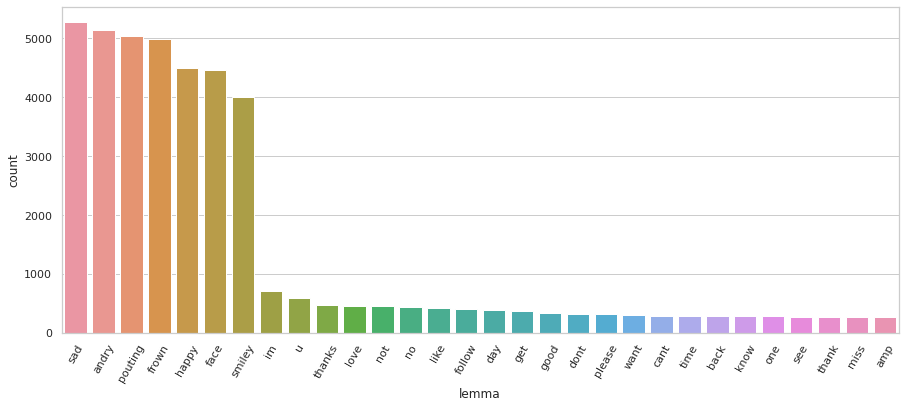

In [74]:
plot_lemmas_top_30 = lemmas_df.sort_values(by="count", ascending=False).head(30)

plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="lemma", y="count", data=plot_lemmas_top_30)
_ = plt.xticks(rotation=60)

**Getting the taggs using `tweets_tokens.`**

In [75]:
from nltk import pos_tag

tweets_df["t_postag"] = tweets_df["tweets"].apply(
    lambda v: nltk.pos_tag(nltk.word_tokenize(v))
)
tweets_df.head()

,tweets,sentiment,tweets_token,t_stem,t_lemma,t_postag
0,followfriday inte paris top engaged members co...,1,"[followfriday, inte, paris, top, engaged, memb...","[followfriday, int, pari, top, engag, member, ...","[followfriday, inte, paris, top, engaged, memb...","[(followfriday, JJ), (inte, JJ), (paris, NN), ..."
1,hey james odd skeptical annoyed undecided unea...,1,"[hey, james, odd, skeptical, annoyed, undecide...","[hey, jame, odd, skeptic, annoy, undecid, unea...","[hey, james, odd, skeptical, annoyed, undecide...","[(hey, NN), (james, NNS), (odd, JJ), (skeptica..."
2,listen last night happy face smiley bleed amaz...,1,"[listen, last, night, happy, face, smiley, ble...","[listen, last, night, happi, face, smiley, ble...","[listen, last, night, happy, face, smiley, ble...","[(listen, VBN), (last, JJ), (night, NN), (happ..."
3,congrats happy face smiley,1,"[congrats, happy, face, smiley]","[congrat, happi, face, smiley]","[congrats, happy, face, smiley]","[(congrats, NNS), (happy, JJ), (face, NN), (sm..."
4,yeaaaah yippppy accnt verified rqst succeed go...,1,"[yeaaaah, yippppy, accnt, verified, rqst, succ...","[yeaaaah, yippppi, accnt, verifi, rqst, succee...","[yeaaaah, yippppy, accnt, verified, rqst, succ...","[(yeaaaah, NN), (yippppy, JJ), (accnt, NN), (v..."


In [76]:
tags = Counter()
tweets_df["t_postag"].apply(tags.update)

tags_df = (
    pd.DataFrame.from_dict(tags, orient="index")
    .reset_index()
    .rename(columns={"index": "tag", 0: "count"})
)

tags_df.sort_values(by="count", ascending=False)

,tag,count
1733,"(sad, JJ)",5208
4610,"(andry, NN)",5061
8,"(happy, JJ)",4495
9,"(face, NN)",4450
10,"(smiley, NN)",3978
...,...,...
7844,"(overdue, JJ)",1
7845,"(mice, NN)",1
7846,"(womandancingwomandancingwomandancingsa, NN)",1
7847,"(joys, NNS)",1


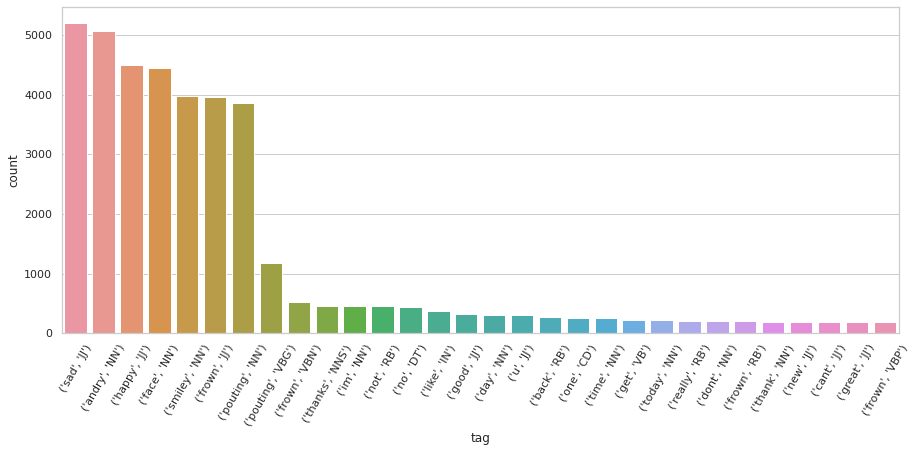

In [77]:
plot_tags_top_30 = tags_df.sort_values(by="count", ascending=False).head(30)

plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="tag", y="count", data=plot_tags_top_30)
_ = plt.xticks(rotation=60)

In [78]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None


tweets_df["lemma_sentence"] = tweets_df["t_postag"].transform(
    lambda value: " ".join(
        [
            lemmatizer.lemmatize(a[0], pos=get_wordnet_pos(a[1]))
            if get_wordnet_pos(a[1])
            else a[0]
            for a in value
        ]
    )
)
tweets_df

,tweets,sentiment,tweets_token,t_stem,t_lemma,t_postag,lemma_sentence
0,followfriday inte paris top engaged members co...,1,"[followfriday, inte, paris, top, engaged, memb...","[followfriday, int, pari, top, engag, member, ...","[followfriday, inte, paris, top, engaged, memb...","[(followfriday, JJ), (inte, JJ), (paris, NN), ...",followfriday inte paris top engage member comm...
1,hey james odd skeptical annoyed undecided unea...,1,"[hey, james, odd, skeptical, annoyed, undecide...","[hey, jame, odd, skeptic, annoy, undecid, unea...","[hey, james, odd, skeptical, annoyed, undecide...","[(hey, NN), (james, NNS), (odd, JJ), (skeptica...",hey james odd skeptical annoyed undecided unea...
2,listen last night happy face smiley bleed amaz...,1,"[listen, last, night, happy, face, smiley, ble...","[listen, last, night, happi, face, smiley, ble...","[listen, last, night, happy, face, smiley, ble...","[(listen, VBN), (last, JJ), (night, NN), (happ...",listen last night happy face smiley bleed amaz...
3,congrats happy face smiley,1,"[congrats, happy, face, smiley]","[congrat, happi, face, smiley]","[congrats, happy, face, smiley]","[(congrats, NNS), (happy, JJ), (face, NN), (sm...",congrats happy face smiley
4,yeaaaah yippppy accnt verified rqst succeed go...,1,"[yeaaaah, yippppy, accnt, verified, rqst, succ...","[yeaaaah, yippppi, accnt, verifi, rqst, succee...","[yeaaaah, yippppy, accnt, verified, rqst, succ...","[(yeaaaah, NN), (yippppy, JJ), (accnt, NN), (v...",yeaaaah yippppy accnt verify rqst succeed get ...
...,...,...,...,...,...,...,...
9995,wan na change avi usanele frown sad andry pouting,0,"[wan, na, change, avi, usanele, frown, sad, an...","[wan, na, chang, avi, usanel, frown, sad, andr...","[wan, na, change, avi, usanele, frown, sad, an...","[(wan, NN), (na, TO), (change, VB), (avi, RB),...",wan na change avi usanele frown sad andry pouting
9996,puppy broke foot frown sad andry pouting,0,"[puppy, broke, foot, frown, sad, andry, pouting]","[puppi, broke, foot, frown, sad, andri, pout]","[puppy, broke, foot, frown, sad, andry, pouting]","[(puppy, JJ), (broke, VBD), (foot, JJ), (frown...",puppy break foot frown sad andry pouting
9997,wheres jaebum baby pictures frown sad andry po...,0,"[wheres, jaebum, baby, pictures, frown, sad, a...","[where, jaebum, babi, pictur, frown, sad, andr...","[wheres, jaebum, baby, picture, frown, sad, an...","[(wheres, NNS), (jaebum, VBP), (baby, NN), (pi...",wheres jaebum baby picture frown sad andry pou...
9998,mr ahmad maslan cooks frown sad andry pouting,0,"[mr, ahmad, maslan, cooks, frown, sad, andry, ...","[mr, ahmad, maslan, cook, frown, sad, andri, p...","[mr, ahmad, maslan, cook, frown, sad, andry, p...","[(mr, NN), (ahmad, NN), (maslan, NN), (cooks, ...",mr ahmad maslan cook frown sad andry pouting


**Double checking the differences between Stemming and Lemmatization**

In [79]:
Sentence_from_Turing = "The idea behind digital computers may be explained by saying that these machines are intended to carry out any operations which could be done by a human computer."

tokens = nltk.word_tokenize(Sentence_from_Turing)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stem and lemmatize
print("{0:30}{1:30}{2:30}".format("Word", "Stemmer", "Lemma\n"))
for word in tokens:
    print(
        "{0:30}{1:30}{2:30}".format(
            word, stemmer.stem(word), lemmatizer.lemmatize(word)
        )
    )

Word                          Stemmer                       Lemma
                        
The                           the                           The                           
idea                          idea                          idea                          
behind                        behind                        behind                        
digital                       digit                         digital                       
computers                     comput                        computer                      
may                           may                           may                           
be                            be                            be                            
explained                     explain                       explained                     
by                            by                            by                            
saying                        say                           saying                        

## <font color='green'>Bag of words model</font>

This model allows us to extract features from the text by converting the text into a matrix of occurrence of words.  

We will take our tweets that have been already processed, and the sentiment (1: Positive, 0: Negative). Then, we will proceed to create a list with the tweets and finally we will be able to use `Countvectorizer`.  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

**Countvectorizer** is a method to convert text to numerical data: It converts a collection of text documents to a matrix of token counts.

In [80]:
df = tweets_df[["tweets", "sentiment"]]
df

,tweets,sentiment
0,followfriday inte paris top engaged members co...,1
1,hey james odd skeptical annoyed undecided unea...,1
2,listen last night happy face smiley bleed amaz...,1
3,congrats happy face smiley,1
4,yeaaaah yippppy accnt verified rqst succeed go...,1
...,...,...
9995,wan na change avi usanele frown sad andry pouting,0
9996,puppy broke foot frown sad andry pouting,0
9997,wheres jaebum baby pictures frown sad andry po...,0
9998,mr ahmad maslan cooks frown sad andry pouting,0


In [81]:
tweets_list = list(tweets_df["tweets"].values)
sentiment = tweets_df["sentiment"].values

In [82]:
tweets_list[:10]

['followfriday inte paris top engaged members community week happy face smiley',
 'hey james odd skeptical annoyed undecided uneasy hesitant please call contact centre able assist happy face smiley many thanks',
 'listen last night happy face smiley bleed amazing track scotland',
 'congrats happy face smiley',
 'yeaaaah yippppy accnt verified rqst succeed got blue tick mark fb profile happy face smiley days',
 'one irresistible happy face smileyflipkartfashionfriday',
 'dont like keep lovely customers waiting long hope enjoy happy friday lwwf happy face smiley',
 'second thought theres not enough time dd happy face smiley new shorts entering system sheep must buying',
 'jgh go bayan bye',
 'act mischievousness calling etl layer inhouse warehousing app katamariwell name implies p']

In [83]:
# define max features
max_features = 100

# each instance will have 10 features
cv = CountVectorizer(max_features=max_features, ngram_range=(1, 2))

In [84]:
matrix_tweets_cv = cv.fit_transform(tweets_list)

# Getting the words
all_words = cv.get_feature_names()

# visualizing the first 50 words
print("First 100 words: \n", all_words[0:100])

First 100 words: 
 ['always', 'amp', 'andry', 'andry pouting', 'back', 'birthday', 'cant', 'come', 'could', 'day', 'didnt', 'dont', 'even', 'face', 'face smiley', 'face smileyconfusion', 'feel', 'follow', 'follow back', 'followed', 'friday', 'frown', 'frown sad', 'fun', 'get', 'go', 'going', 'good', 'got', 'great', 'guys', 'happy', 'happy face', 'hey', 'hi', 'home', 'hope', 'ill', 'im', 'ive', 'kik', 'know', 'last', 'let', 'like', 'lol', 'looking', 'lot', 'love', 'lt', 'make', 'miss', 'morning', 'much', 'na', 'need', 'never', 'new', 'next', 'nice', 'night', 'no', 'not', 'oh', 'one', 'people', 'please', 'pouting', 'really', 'right', 'sad', 'sad andry', 'see', 'sleep', 'smiley', 'smileyconfusion', 'snapchat', 'someone', 'soon', 'sorry', 'still', 'thank', 'thanks', 'thats', 'think', 'time', 'today', 'us', 'via', 'wan', 'wan na', 'want', 'week', 'weekend', 'well', 'wish', 'work', 'would', 'yes', 'youre']


In [85]:
wordfreq = cv.vocabulary_
wordfreq

{'week': 92,
 'happy': 31,
 'face': 13,
 'smiley': 74,
 'happy face': 32,
 'face smiley': 14,
 'hey': 33,
 'please': 66,
 'thanks': 82,
 'last': 42,
 'night': 60,
 'got': 28,
 'one': 64,
 'dont': 11,
 'like': 44,
 'hope': 36,
 'friday': 20,
 'not': 62,
 'time': 85,
 'new': 57,
 'go': 25,
 'love': 48,
 'follow': 17,
 'amp': 1,
 'back': 4,
 'follow back': 18,
 'know': 41,
 'great': 29,
 'get': 24,
 'today': 86,
 'hi': 34,
 'smileyconfusion': 75,
 'face smileyconfusion': 15,
 'need': 55,
 'ive': 39,
 'fun': 23,
 'lol': 45,
 'thank': 81,
 'us': 87,
 'well': 94,
 'kik': 40,
 'come': 7,
 'lot': 47,
 'see': 72,
 'lt': 49,
 'oh': 63,
 'looking': 46,
 'next': 58,
 'feel': 16,
 'never': 56,
 'good': 27,
 'im': 38,
 'going': 26,
 'would': 97,
 'no': 61,
 'someone': 77,
 'yes': 98,
 'cant': 6,
 'still': 80,
 'day': 9,
 'via': 88,
 'let': 43,
 'youre': 99,
 'weekend': 93,
 'make': 50,
 'really': 68,
 'sleep': 73,
 'birthday': 5,
 'want': 91,
 'miss': 51,
 'morning': 52,
 'thats': 83,
 'ill': 37,
 '

In [86]:
matrix_tweets_cv.toarray()[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
print(cv.get_feature_names())

['always', 'amp', 'andry', 'andry pouting', 'back', 'birthday', 'cant', 'come', 'could', 'day', 'didnt', 'dont', 'even', 'face', 'face smiley', 'face smileyconfusion', 'feel', 'follow', 'follow back', 'followed', 'friday', 'frown', 'frown sad', 'fun', 'get', 'go', 'going', 'good', 'got', 'great', 'guys', 'happy', 'happy face', 'hey', 'hi', 'home', 'hope', 'ill', 'im', 'ive', 'kik', 'know', 'last', 'let', 'like', 'lol', 'looking', 'lot', 'love', 'lt', 'make', 'miss', 'morning', 'much', 'na', 'need', 'never', 'new', 'next', 'nice', 'night', 'no', 'not', 'oh', 'one', 'people', 'please', 'pouting', 'really', 'right', 'sad', 'sad andry', 'see', 'sleep', 'smiley', 'smileyconfusion', 'snapchat', 'someone', 'soon', 'sorry', 'still', 'thank', 'thanks', 'thats', 'think', 'time', 'today', 'us', 'via', 'wan', 'wan na', 'want', 'week', 'weekend', 'well', 'wish', 'work', 'would', 'yes', 'youre']


In [88]:
len(cv.get_feature_names())

100

* Preparing the data for Modeling

In [89]:
X = matrix_tweets_cv.toarray()
y = sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [90]:
print(X_train.shape)
print(X_test.shape)

(7000, 100)
(3000, 100)


In [91]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9643333333333334


## <font color='green'>Can we improve the bag of words model?  </font>

The main issue is that different sentences can yield same/similar vectors.
TF-IDF allows for a simple mathematical way of defining word "importance". This allows for a smarter document vector. 

## TF-IDF (term frequency–inverse document frequency)
Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

Term frequency: This summarizes how often a word appears within a documents.

Inverse document frequency: This downscales words that appear a lot across documents  in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

It is calculated as:

$$
TFIDF_{i,j} = TF_{i,j} \times \log \frac{N}{DF_i}
$$

where $TF_{i,j}$ is the total number of occurences of $i$ in $j$, $DF_i$ is the total number of documents containing $i$ and $N$ is the total number of documents.

In [92]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(df["tweets"])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df["sentiment"], test_size=0.3, random_state=123
)

In [94]:
# getting the words
all_words = tf.get_feature_names()

# visualize first 50 words
print("First 50 words: ", all_words[0:50])

First 50 words:  ['aa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaah', 'aaaaaand', 'aaaaages', 'aaaaahhhhhhhh', 'aaaahh', 'aaaahhh', 'aaahhh', 'aah', 'aahhhh', 'aaj', 'aameenall', 'aameenhappy', 'aamir', 'aapke', 'aaron', 'aarwwi', 'aasramany', 'aayegi', 'ab', 'abandoned', 'abandoning', 'abbeytaylor', 'abby', 'abbycan', 'abbymill', 'abes', 'abhi', 'abi', 'abit', 'abla', 'able', 'abligaverins', 'aboard', 'abouty', 'abp', 'abroad', 'abrupt', 'abs', 'abscess', 'absent', 'absolute', 'absolutely', 'abstinence', 'abt', 'abu', 'abudhabi', 'abusive']


In [96]:
print(tf.vocabulary_)

{'followfriday': 4009, 'inte': 5513, 'paris': 8309, 'top': 11824, 'engaged': 3417, 'members': 7087, 'community': 2211, 'week': 12617, 'happy': 4792, 'face': 3658, 'smiley': 10448, 'hey': 4971, 'james': 5682, 'odd': 7957, 'skeptical': 10364, 'annoyed': 454, 'undecided': 12140, 'uneasy': 12149, 'hesitant': 4967, 'please': 8675, 'call': 1676, 'contact': 2298, 'centre': 1818, 'able': 33, 'assist': 652, 'many': 6891, 'thanks': 11525, 'listen': 6494, 'last': 6281, 'night': 7750, 'bleed': 1264, 'amazing': 361, 'track': 11872, 'scotland': 9909, 'congrats': 2268, 'yeaaaah': 13014, 'yippppy': 13071, 'accnt': 63, 'verified': 12347, 'rqst': 9690, 'succeed': 11097, 'got': 4502, 'blue': 1300, 'tick': 11681, 'mark': 6915, 'fb': 3791, 'profile': 9010, 'days': 2677, 'one': 8056, 'irresistible': 5577, 'smileyflipkartfashionfriday': 10497, 'dont': 3070, 'like': 6440, 'keep': 5991, 'lovely': 6657, 'customers': 2560, 'waiting': 12498, 'long': 6583, 'hope': 5099, 'enjoy': 3427, 'friday': 4112, 'lwwf': 6739,

In [97]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.973


* Human language is astoundingly perplexing and diverse. NLP is an approach that helps us improve our communication and influence skills at a time these are becoming even more important. 

* Even though computing systems enable fast and highly accurate communication channels, machines have never been good at understanding how and why we communicate in the first place.


*  NLP is significant in light of the fact that it helps settle ambiguity in language and adds valuable numeric structure to the information for some downstream applications, for example, speech recognition or text analytics.